<a href="https://colab.research.google.com/github/aaditya9803/ml/blob/main/laptop_price_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the File from Google Drive

In [ ]:
#Giving access to the metroPT3.csv in google coolab
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Get the file
downloaded = drive.CreateFile({'id':'1CW6UqaJSRM9vx_Fnwi-ypjEM3RUhEOJ4'})
downloaded.GetContentFile('laptop_price - dataset.csv')

## Importing Python Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import KFold


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Preprocessing the dataset

In [ ]:
train_data = pd.read_csv(('laptop_price - dataset.csv'), sep=',', header=0)
df = pd.DataFrame(train_data)
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


In [ ]:
print('company - ',len(df['Company'].unique()))
print('Product - ',len(df['Product'].unique()))
print('TypeName - ',len(df['TypeName'].unique()))
print('Inches - ',len(df['Inches'].unique()))
print('ScreenResolution - ',len(df['ScreenResolution'].unique()))
print('CPU Company - ',len(df['CPU_Company'].unique()))
print('CPU Type - ',len(df['CPU_Type'].unique()))
print('CPU_Frequency (GHz) - ',len(df['CPU_Frequency (GHz)'].unique()))
print('Ram - ',len(df['RAM (GB)'].unique()))
print('Memory - ',len(df['Memory'].unique()))
print('GPU Company - ',len(df['GPU_Company'].unique()))
print('GPU Type - ',len(df['GPU_Type'].unique()))
print('OpSys - ',len(df['OpSys'].unique()))
print('Weight - ',len(df['Weight (kg)'].unique()))
print('Price - ',len(df['Price (Euro)'].unique()))

company -  19
Product -  618
TypeName -  6
Inches -  18
ScreenResolution -  40
CPU Company -  3
CPU Type -  93
CPU_Frequency (GHz) -  25
Ram -  9
Memory -  39
GPU Company -  4
GPU Type -  106
OpSys -  9
Weight -  171
Price -  791


In [ ]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
df['ScreenResolution'].head()

,ScreenResolution
0,IPS Panel Retina Display 2560x1600
1,1440x900
2,Full HD 1920x1080
3,IPS Panel Retina Display 2880x1800
4,IPS Panel Retina Display 2560x1600


In [ ]:
def calculate_resolution_product(resolution):
    try:
        numbers = [int(num) for num in re.findall(r'\d+', str(resolution))]

        if len(numbers) >= 2:
            return numbers[0] * numbers[1]
        else:
            return 0
    except ValueError:
        return 0

df['ScreenResolution'] = df['ScreenResolution'].apply(calculate_resolution_product)

In [ ]:
df['ScreenResolution'].head()

,ScreenResolution
0,4096000
1,1296000
2,2073600
3,5184000
4,4096000


In [ ]:
df.describe()

,Inches,ScreenResolution,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1.275000e+03,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,1.900364e+06,2.302980,8.440784,2.040525,1134.969059
std,1.429470,8.707181e+05,0.503846,5.097809,0.669196,700.752504
min,10.100000,1.536000e+04,0.900000,2.000000,0.690000,174.000000
25%,14.000000,1.049088e+06,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.073600e+06,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.073600e+06,2.700000,8.000000,2.310000,1496.500000
max,18.400000,5.760000e+06,3.600000,64.000000,4.700000,6099.000000


In [ ]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [ ]:
cpu_type_counts = df['CPU_Type'].value_counts()
print(cpu_type_counts)

CPU_Type
Core i5 7200U       193
Core i7 7700HQ      147
Core i7 7500U       133
Core i3 6006U        81
Core i7 8550U        73
                   ... 
Core M m3             1
E-Series E2-9000      1
Core M M3-6Y30        1
A6-Series 7310        1
A9-Series 9410        1
Name: count, Length: 93, dtype: int64


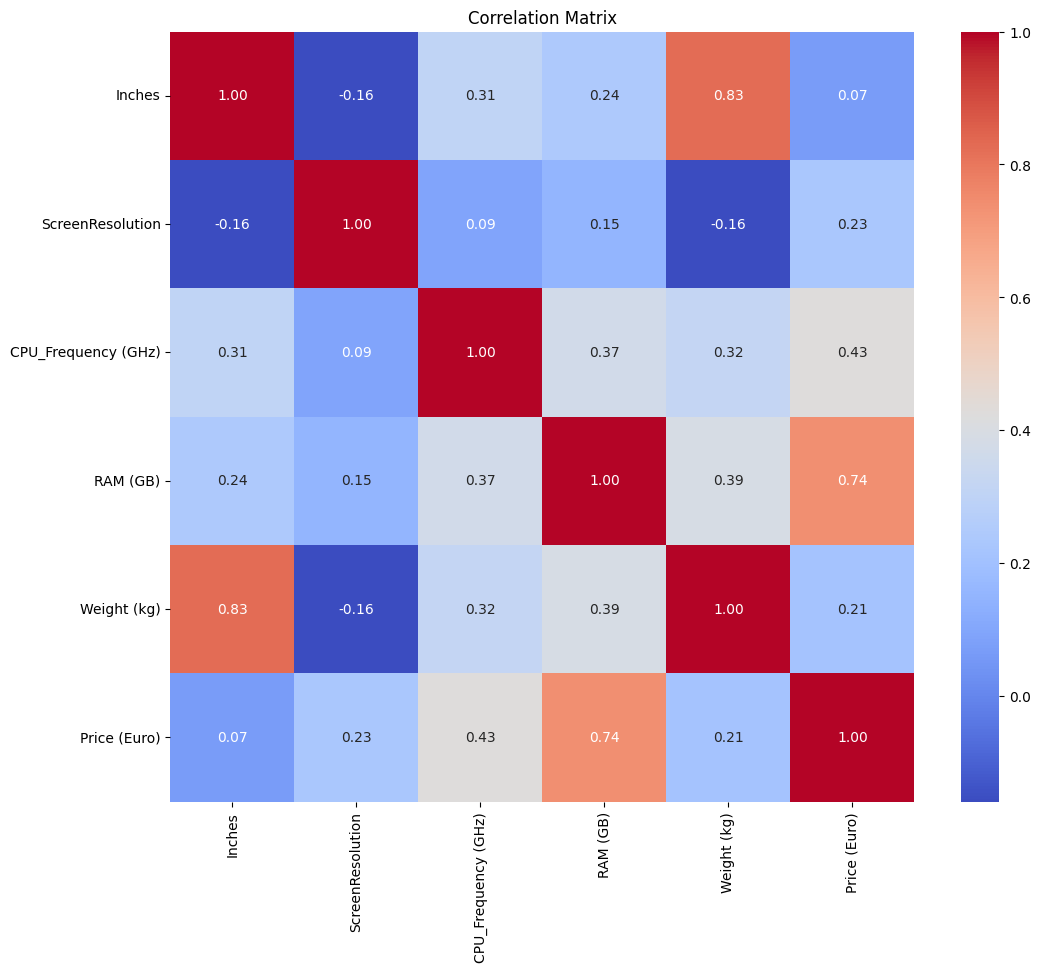

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
correlations = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

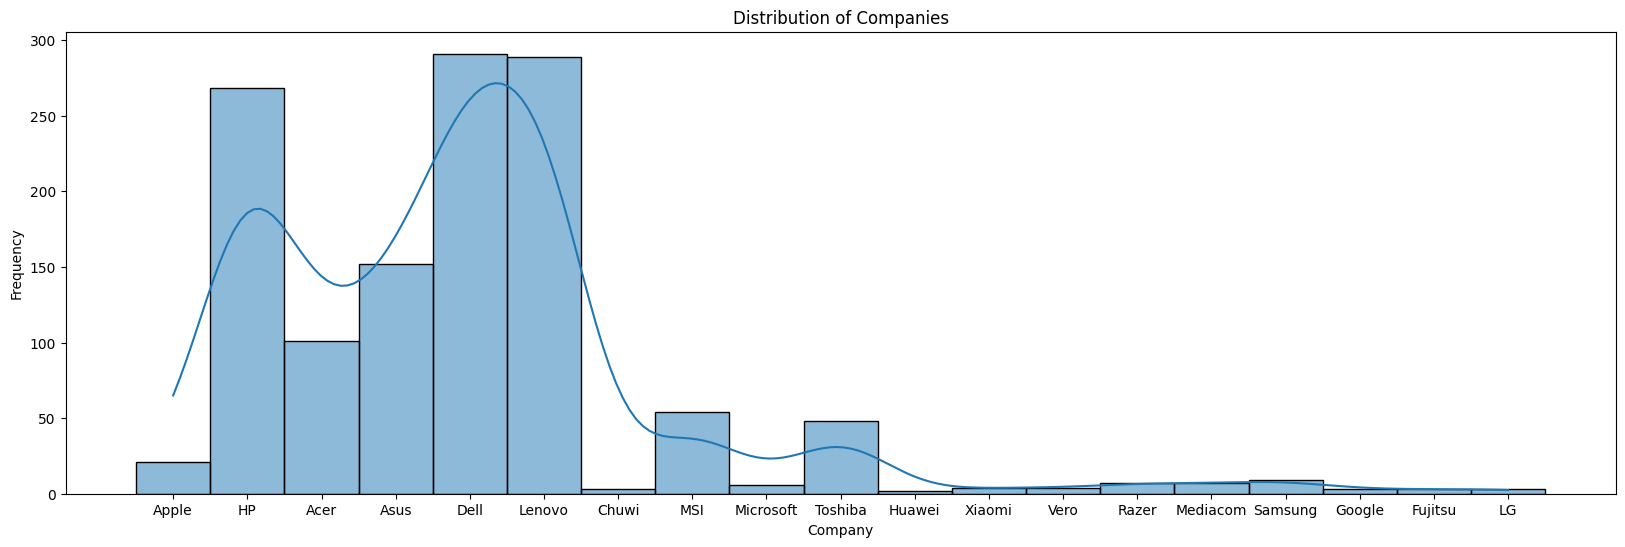

In [ ]:
#Histogram
plt.figure(figsize=(20, 6))
sns.histplot(df['Company'], kde=True)
plt.title('Distribution of Companies')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.show()

In [ ]:
X = df.drop(columns=df.columns[14]) #Features
y = df[df.columns[14]] #Target
y

,Price (Euro)
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1270,638.00
1271,1499.00
1272,229.00
1273,764.00


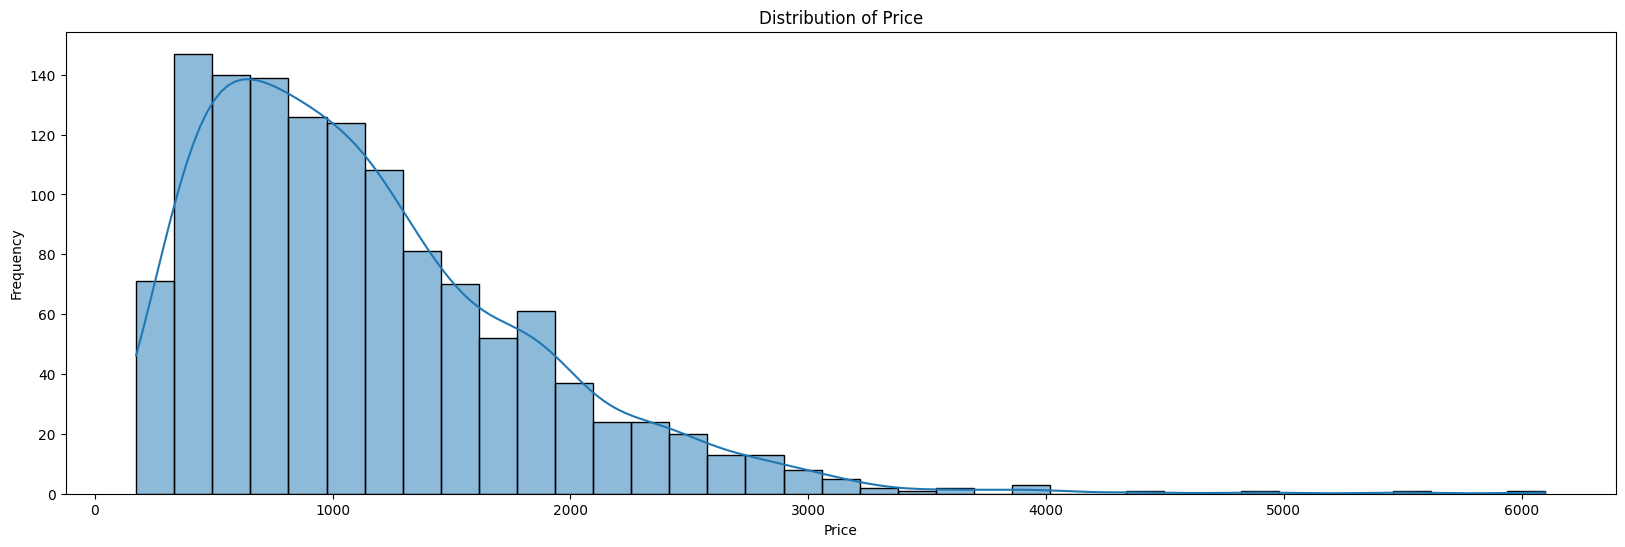

In [ ]:
#Histogram
plt.figure(figsize=(20, 6))
sns.histplot(df['Price (Euro)'], kde=True) # Changed 'price' to 'Price (Euro)'
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Labelling and Scalling

In [ ]:
#Labelencoder
label_encoder = LabelEncoder()

columns_to_label = ['Company', 'CPU_Company', 'CPU_Type', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys']

for column in columns_to_label:
    df[column] = df[column].astype(str)
    df[column] = label_encoder.fit_transform(df[column])

df = df.drop(columns=['Product','TypeName'])
df.head()

,Company,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,1,13.3,4096000,1,40,2.3,8,4,2,56,8,1.37,1339.69
1,1,13.3,1296000,1,40,1.8,8,2,2,50,8,1.34,898.94
2,7,15.6,2073600,1,46,2.5,8,16,2,52,4,1.86,575.00
3,1,15.4,5184000,1,54,2.7,16,29,0,76,8,1.83,2537.45
4,1,13.3,4096000,1,40,3.1,8,16,2,57,8,1.37,1803.60


In [ ]:
X=df
# .drop(columns=df.columns[12])
# y=df[df.columns[12]]
X_scaled = pd.DataFrame(X.drop(columns=['Company','CPU_Company','CPU_Type','Memory','GPU_Company','GPU_Type','OpSys']))
# print(X_scaled.head())


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_scaled)
# y = scaler.fit_transform(y)


X_scaled = pd.DataFrame(X_scaled, columns=['Inches','ScreenResolution','CPU_Frequency (GHz)','RAM (GB)','Weight (kg)', 'Price (Euro)'])
print(X_scaled.head())
X = pd.concat([X[['Company','CPU_Company','CPU_Type','Memory','GPU_Company','GPU_Type','OpSys']], X_scaled], axis=1)
y=X[X.columns[12]]
X=X.drop(columns=df.columns[12])
X.head()

     Inches  ScreenResolution  CPU_Frequency (GHz)  RAM (GB)  Weight (kg)  \
0  0.385542          0.710339             0.518519  0.096774     0.169576   
1  0.385542          0.222928             0.333333  0.096774     0.162095   
2  0.662651          0.358289             0.592593  0.096774     0.291771   
3  0.638554          0.899733             0.666667  0.225806     0.284289   
4  0.385542          0.710339             0.814815  0.096774     0.169576   

   Price (Euro)  
0      0.196741  
1      0.122353  
2      0.067679  
3      0.398895  
4      0.275038  


,Company,CPU_Company,CPU_Type,Memory,GPU_Company,GPU_Type,OpSys,Inches,ScreenResolution,CPU_Frequency (GHz),RAM (GB),Weight (kg)
0,1,1,40,4,2,56,8,0.385542,0.710339,0.518519,0.096774,0.169576
1,1,1,40,2,2,50,8,0.385542,0.222928,0.333333,0.096774,0.162095
2,7,1,46,16,2,52,4,0.662651,0.358289,0.592593,0.096774,0.291771
3,1,1,54,29,0,76,8,0.638554,0.899733,0.666667,0.225806,0.284289
4,1,1,40,16,2,57,8,0.385542,0.710339,0.814815,0.096774,0.169576


In [ ]:
# Y to Discrete from Continuous

# # Check if y is continuous and convert to discrete if necessary
# if pd.api.types.is_numeric_dtype(y) and not pd.api.types.is_bool_dtype(y) and y.nunique() > 10:
#   print('true') # Check if continuous and not boolean, threshold 10 to not convert ordinal to classes
#   y = pd.qcut(y, q=10, labels=False, duplicates='drop') # Convert to discrete with 10 quantiles

In [ ]:
y.head()

,Price (Euro)
0,0.196741
1,0.122353
2,0.067679
3,0.398895
4,0.275038


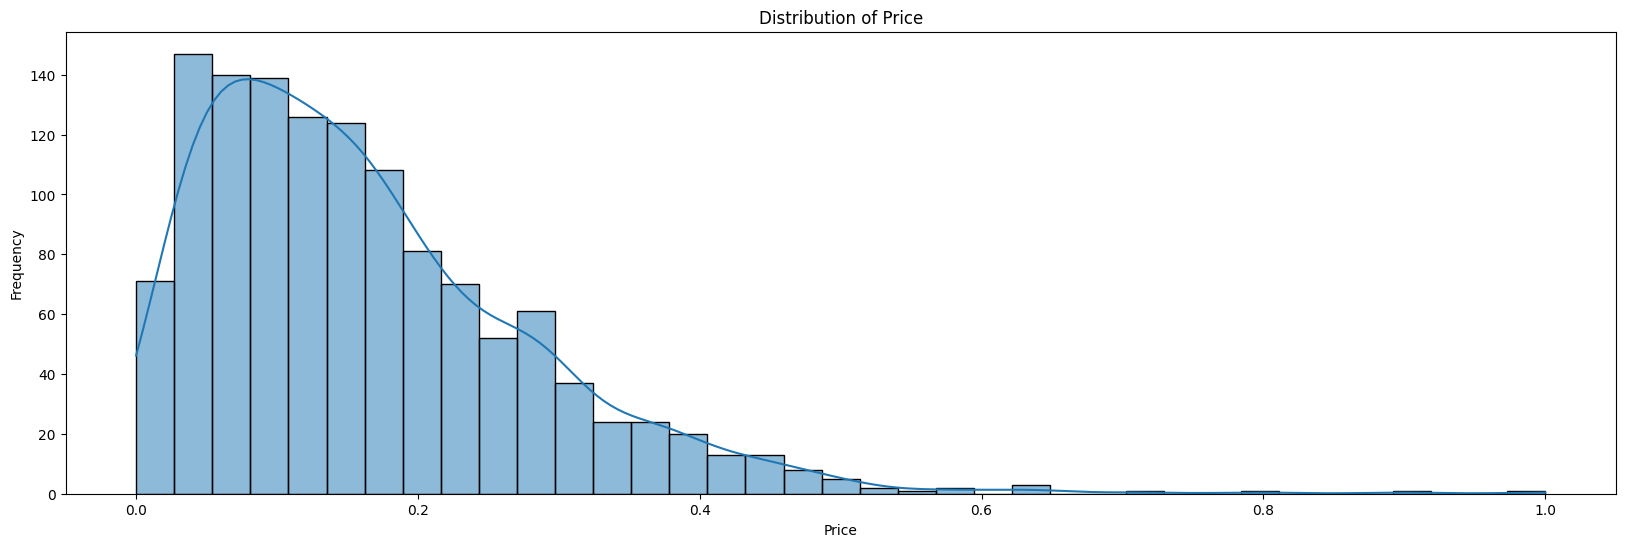

In [ ]:
#Histogram
plt.figure(figsize=(20, 6))
sns.histplot(y, kde=True) # Changed 'price' to 'Price (Euro)'
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(y.describe())


count    1275.000000
mean        0.162189
std         0.118270
min         0.000000
25%         0.073418
50%         0.137553
75%         0.223207
max         1.000000
Name: Price (Euro), dtype: float64


## Test Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# y_train.unique()

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
def randomforest(X, y, num_folds=5):
    # Split data into train and test sets for final evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)



    # Compute sample weights based on the target
    weights = compute_sample_weight(class_weight='balanced', y=y_train)

    # Initialize and train the final model
    model = RandomForestRegressor(
            n_estimators=100,
            random_state=45,
            max_depth=15,
            min_samples_leaf=3,
            max_features="sqrt",
        )
    model.fit(X_train, y_train, sample_weight=weights)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate and print regression metrics for the final model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Test train Model Mean Squared Error: {mse:.4f}")
    print(f"Test Train Model R-squared: {r2:.4f}")
    residuals = y_test - y_pred
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residuals vs True Price")


    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
      print(f"Fold {fold_idx + 1}:")



      X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
      y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
      weights = compute_sample_weight(class_weight='balanced', y=y_train)
      model.fit(X_train, y_train, sample_weight=weights)

      # Make predictions on the test set
      y_pred = model.predict(X_test)

      # Calculate and print regression metrics for the final model
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      print(f"Fold {fold_idx + 1}  Model Mean Squared Error: {mse:.4f}")
      print(f"Fold {fold_idx + 1}  Model R-squared: {r2:.4f}")


Test train Model Mean Squared Error: 0.0010
Test Train Model R-squared: 0.8990
Fold 1:
Fold 1  Model Mean Squared Error: 0.0021
Fold 1  Model R-squared: 0.8481
Fold 2:
Fold 2  Model Mean Squared Error: 0.0026
Fold 2  Model R-squared: 0.8258
Fold 3:
Fold 3  Model Mean Squared Error: 0.0021
Fold 3  Model R-squared: 0.8362
Fold 4:
Fold 4  Model Mean Squared Error: 0.0028
Fold 4  Model R-squared: 0.8197
Fold 5:
Fold 5  Model Mean Squared Error: 0.0024
Fold 5  Model R-squared: 0.8063


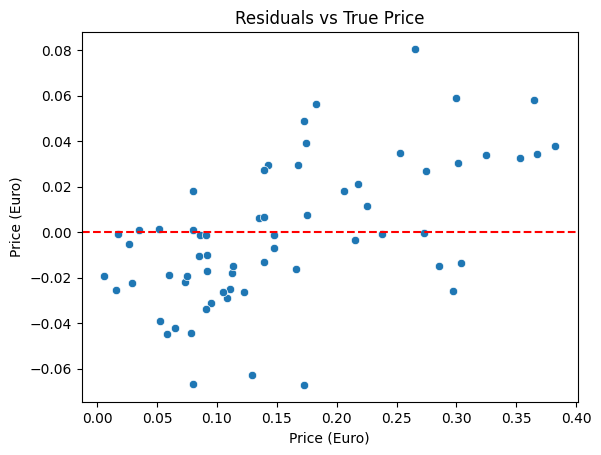

In [ ]:
randomforest(X,y)

In [ ]:
def xgb_(X, y, num_folds=5):

    kf = KFold(n_splits=num_folds, shuffle=True, random_state=24)

    # Lists to store evaluation metrics for each fold
    r2_scores = []  # Changed from f1_scores
    mse_scores = [] # Changed from accuracies
    rmse_scores = [] # List to store RMSE scores

    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"Fold {fold_idx + 1}:")

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Initialize and train the XGBoost model (Regressor)
        xgb1 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=8,
                                 gamma=0.5, scale_pos_weight=1.5, alpha=0.2,
                                 reg_lambda=0.1)

        # Fit the model
        xgb1.fit(X_train, y_train)

        # Make predictions
        y_pred = xgb1.predict(X_test)

        # Calculate and store metrics for this fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        rmse = np.sqrt(mse) # Calculate RMSE
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred) # Calculate R-squared
        r2_scores.append(r2)

        print(f"Fold {fold_idx + 1} MSE: {mse:.4f}")
        print(f"Fold {fold_idx + 1} RMSE: {rmse:.4f}") # Print RMSE
        print(f"Fold {fold_idx + 1} R-squared: {r2:.4f}") # Print R-squared

        print("-" * 30)



    # Calculate and print average metrics across all folds
    avg_r2 = np.mean(r2_scores)
    avg_mse = np.mean(mse_scores)
    avg_rmse = np.mean(rmse_scores) # Calculate average RMSE

    print(f"Average R-squared across {num_folds} folds: {avg_r2:.4f}")
    print(f"Average MSE across {num_folds} folds: {avg_mse:.4f}")
    print(f"Average RMSE across {num_folds} folds: {avg_rmse:.4f}") # Print average RMSE

In [ ]:
xgb_(X, y)

Fold 1:
Fold 1 MSE: 0.0062
Fold 1 RMSE: 0.0788
Fold 1 R-squared: 0.6003
------------------------------
Fold 2:
Fold 2 MSE: 0.0044
Fold 2 RMSE: 0.0666
Fold 2 R-squared: 0.5841
------------------------------
Fold 3:
Fold 3 MSE: 0.0065
Fold 3 RMSE: 0.0808
Fold 3 R-squared: 0.5784
------------------------------
Fold 4:
Fold 4 MSE: 0.0070
Fold 4 RMSE: 0.0838
Fold 4 R-squared: 0.5217
------------------------------
Fold 5:
Fold 5 MSE: 0.0056
Fold 5 RMSE: 0.0746
Fold 5 R-squared: 0.5821
------------------------------
Average R-squared across 5 folds: 0.5733
Average MSE across 5 folds: 0.0060
Average RMSE across 5 folds: 0.0769


In [ ]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


model_1 = LinearRegression()
model_2 = SGDRegressor()
model_3 = Lasso()
model_4 = Ridge()
model_5 = ElasticNet()
model_6 = SVR()
model_7 = KNeighborsRegressor()
model_8 = DecisionTreeRegressor()
model_9 = RandomForestRegressor()
model_10 = BaggingRegressor()
model_11 = ExtraTreesRegressor()
model_12 = AdaBoostRegressor()
model_13 = XGBRegressor(verbose=0)
model_14 = LGBMRegressor(verbose=0)

In [ ]:
model_1.fit(x_train,y_train)
model_2.fit(x_train,y_train)
model_3.fit(x_train,y_train)
model_4.fit(x_train,y_train)
model_5.fit(x_train,y_train)
model_6.fit(x_train,y_train)
model_7.fit(x_train,y_train)
model_8.fit(x_train,y_train)
model_9.fit(x_train,y_train)
model_10.fit(x_train,y_train)
model_11.fit(x_train,y_train)
model_12.fit(x_train,y_train)
model_13.fit(x_train,y_train)
model_14.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:55:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


LGBMRegressor(verbose=0)

In [ ]:
# List of models:
models = [model_1, model_2, model_3, model_4, model_5,
          model_6, model_7, model_8, model_9, model_10,
          model_11, model_12, model_13, model_14]
# The models_names list had an extra item 'CatBoostRegressor'
# It should have the same length as the 'models' list
models_names = ['LinearRegression', 'SGDRegressor', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'BaggingRegressor', 'ExtraTreesRegressor', 'AdaBoostRegressor', 'XGBRegressor', 'LGBMRegressor']

# Calculate predictions and squared errors for each model:
squared_errors = []
for model in models:
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    squared_errors.append(f'{mse * 100:.2f}%')  # Format as percentage

# Calculate train and test scores:
train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

# Difference between training and testing ratio
ratio = []
for train, test in zip(train_score, test_score):
    result = train - test
    ratio.append(f'{result * 100:.2f}%')

# Measure model state:6
rate = []
for train, test in zip(train_score, test_score):
    if train <= 0.65 and test <= 0.65:
        rate.append('bad')
    elif train > test * 1.10:
        rate.append('overfite')
    elif train > 0.65 and train < 0.80 and test > 0.65 and test < 0.80:
        rate.append('middle')
    elif train >= 0.80 and test >= 0.80 and train < 1.00 and test < 1.00:
        rate.append('good')
    elif train >= 0.80 and test < 0.80:
        rate.append('high train, low test')
    else:
        rate.append('unknown')

# Create DataFrame
model_score = pd.DataFrame({
    'Model': models_names,
    'Train score': [f'{round(score * 100, 2)}%' for score in train_score],
    'Test score': [f'{round(score * 100, 2)}%' for score in test_score],
    'Ratio difference': ratio,
    'Evaluate model': rate,
    'Squared error': squared_errors
})

# Show result:
model_score

,Model,Train score,Test score,Ratio difference,Evaluate model,Squared error
0,LinearRegression,67.55%,69.18%,-1.63%,middle,0.44%
1,SGDRegressor,-6.691986833339949e+27%,-6.194626640304403e+27%,-497360193035545940347322368.00%,bad,87582445665706462674944000.00%
2,Lasso,0.0%,-0.53%,0.53%,bad,1.42%
3,Ridge,66.94%,67.81%,-0.87%,middle,0.46%
4,ElasticNet,16.73%,14.58%,2.15%,bad,1.21%
5,SVR,43.15%,40.45%,2.71%,bad,0.84%
6,KNeighborsRegressor,74.35%,63.01%,11.35%,overfite,0.52%
7,DecisionTreeRegressor,99.82%,74.0%,25.82%,overfite,0.37%
8,RandomForestRegressor,97.41%,88.2%,9.21%,overfite,0.17%
9,BaggingRegressor,96.51%,87.68%,8.83%,overfite,0.17%
